# **Exploratory Data Analysis on Automobile sales during recession & Non Recession period** 


### Installing Required Libraries



In [1]:
%pip install seaborn
%pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing Required Libraries


In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

---


# Scenario

In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.


---


# Importing Data
## The data used here is provided by the IBM Skills network for the course Data Visualization using Python hosted on Coursera

In [3]:


import pandas as pd

text = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

df = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [66]:
df.describe()
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [24]:
df.columns
df.dtypes


Date                        object
Year                         int64
Month                       object
Recession                    int64
Consumer_Confidence        float64
Seasonality_Weight         float64
Price                      float64
Advertising_Expenditure      int64
Competition                  int64
GDP                        float64
Growth_Rate                float64
unemployment_rate          float64
Automobile_Sales           float64
Vehicle_Type                object
City                        object
dtype: object

---


# Creating Visualizations for Data Analysis


# Automobile Sales Fluctuations from year to Year

Text(0.5, 1.0, 'Automobile Sales over Time')

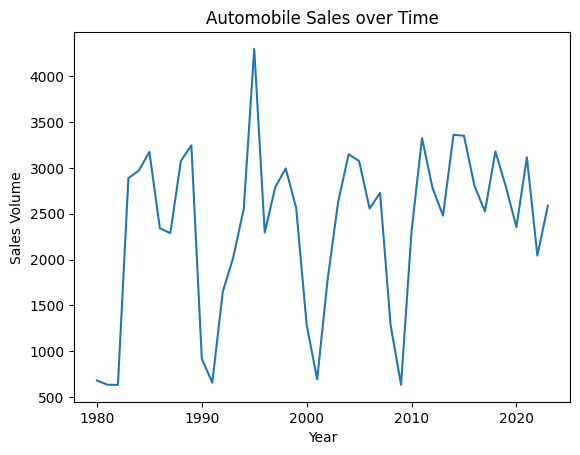

In [4]:
df.head()
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
df_line.plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales over Time')


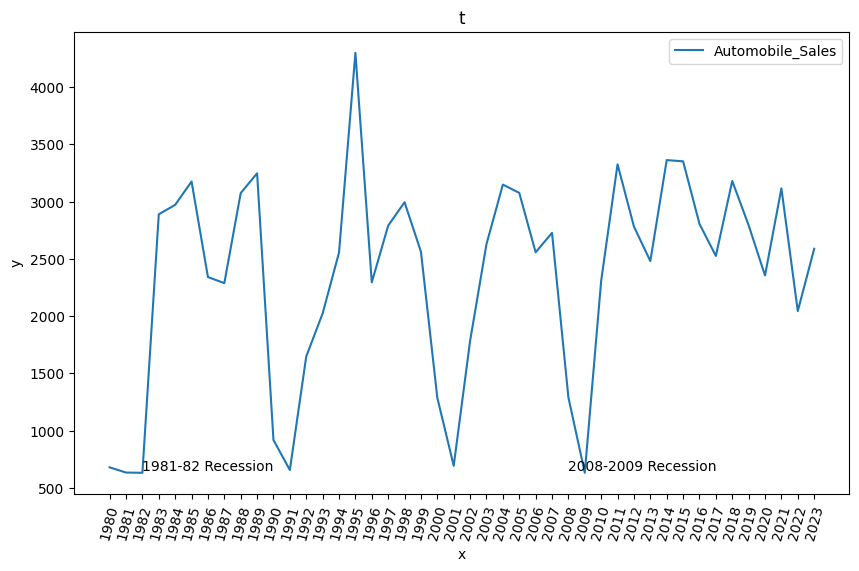

In [64]:
years= list(df['Year'])
plt.figure(figsize=(10, 6))
df_line = df.groupby('Year')['Automobile_Sales'].mean()
df_line.plot(kind = 'line')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('x')
plt.ylabel('y')
plt.title('t')
plt.text(1982, 650, '1981-82 Recession')
plt.text(2008, 650, '2008-2009 Recession')
plt.legend()
plt.show()


####  Sales Trends of different types of vehicles


In [6]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


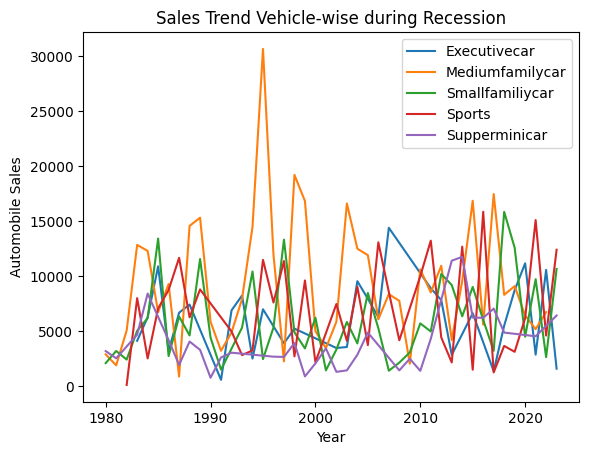

In [11]:
df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

From the above plot we could get the inference that during the recession period the sales of sports cars becomes drastically due due to high buying cost, whereas sales of medium family cars and small mini cars increases.

----


### Sales in Recession period vs Non Recession period

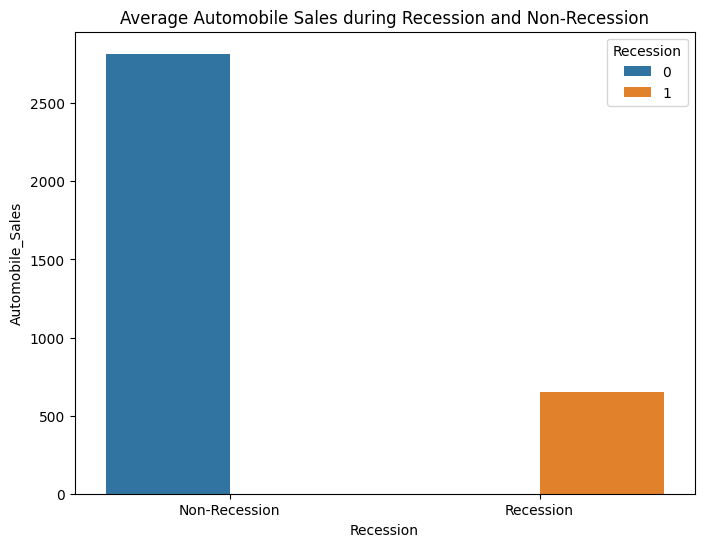

In [28]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)

plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

### Sales of different types of vehicles during recession & non recession period


Text(0.5, 1.0, 'Vehicle-Wise Sales during Recession and Non-Recession Period')

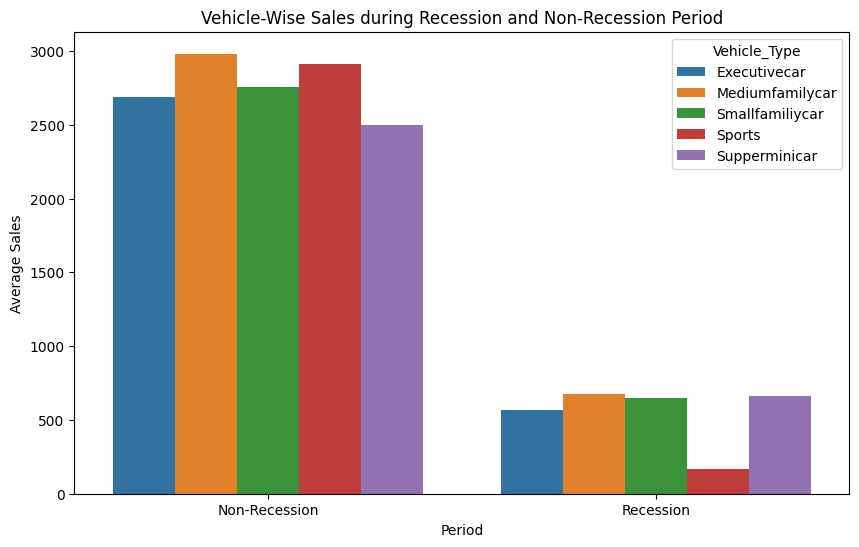

In [30]:

dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')


During recession period the sales of every vehicle type reduced drastically, while we can observe that the supermini cars are more favourable option for people during recession period due to its low cost and efficiency

---


### Variation of GDP during Recession & Non Recession period

Text(0.5, 1.0, 'GDP Variation during Non Recession Period')

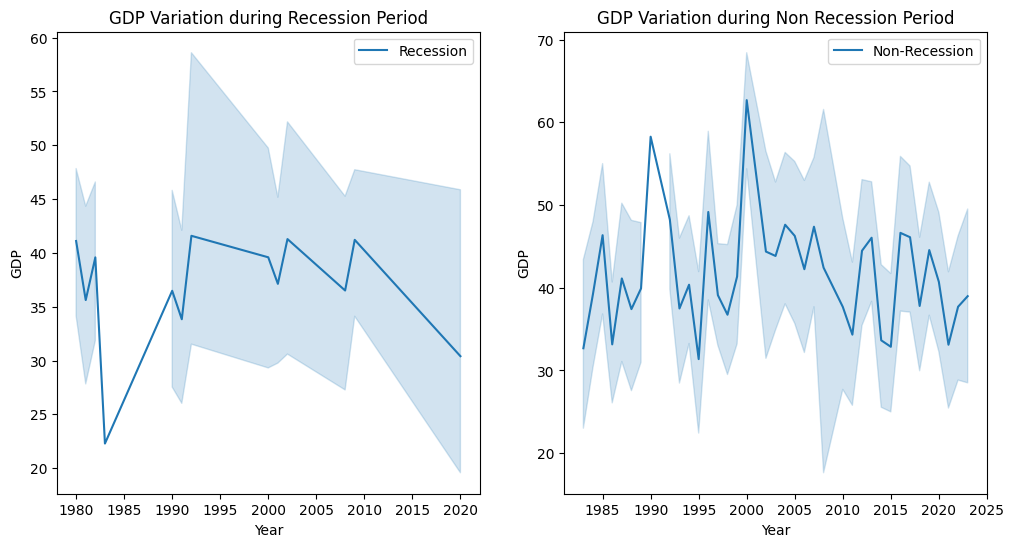

In [34]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]
    
    #Figure
fig=plt.figure(figsize=(12, 6))
    
    #Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1 ,2 ,2 ) # add subplot 2 (1 row, 2 columns, second plot). 
    
    #plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')
    
    #plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non Recession Period')
    


From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company


---


### Impact on seasonality on Automobile Sales


Text(0.5, 1.0, 'Seasonality impact on Automobile Sales')

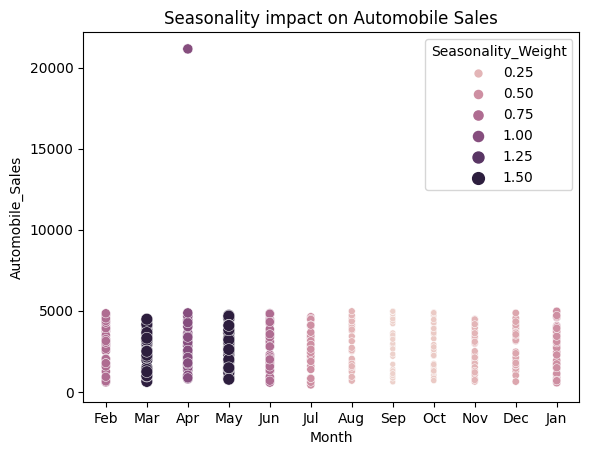

In [37]:
non_rec_data = df[df['Recession'] == 0]

size=non_rec_data['Seasonality_Weight'] 
    
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', hue='Seasonality_Weight',size=size)

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April



---


 ### Correlation between consumer confidence & Automobile Sales during recession

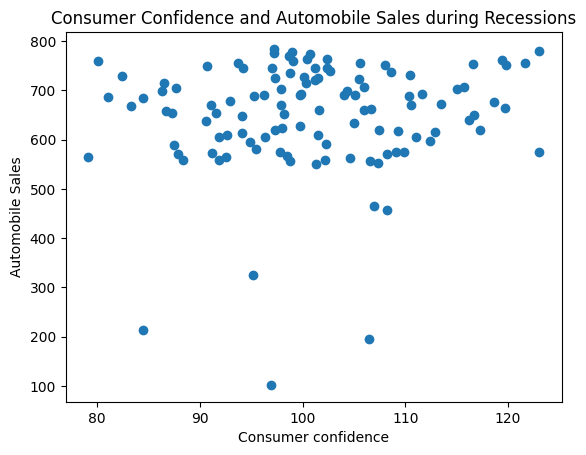

In [47]:
df_rec= df[df['Recession']==1]

df_rec = df[df['Recession'] == 1]
plt.scatter(df_rec['Consumer_Confidence'], df_rec['Automobile_Sales'])
    
plt.xlabel('Consumer confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()


 ### Average vehicle price relation to the sales volume during recessions


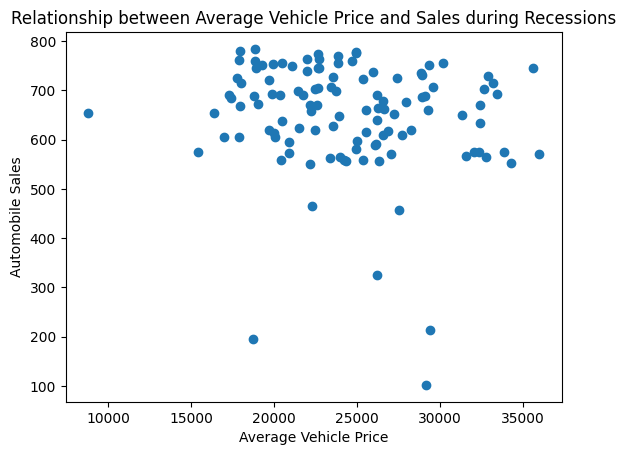

In [49]:
df_rec = df[df['Recession'] == 1]
plt.scatter(df_rec['Price'], df_rec['Automobile_Sales'])
    
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

----


 ### Advertising Expenditure in Recession & Non Recession periods


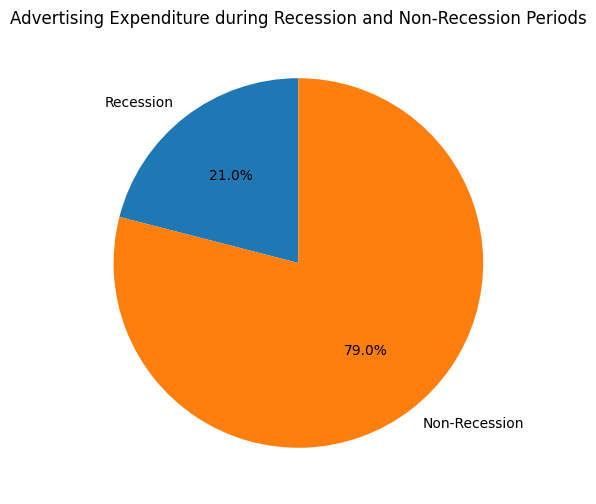

In [57]:
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()
plt.figure(figsize=(8, 6))
labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')
plt.show()


It seems ABCAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times as getting buyers have been difficuilt.



---


### Total Advertising expenditure of different types of vehicles during recession period

Text(0.5, 1.0, 'Advertisement expenditure for each vehicle type during recession period')

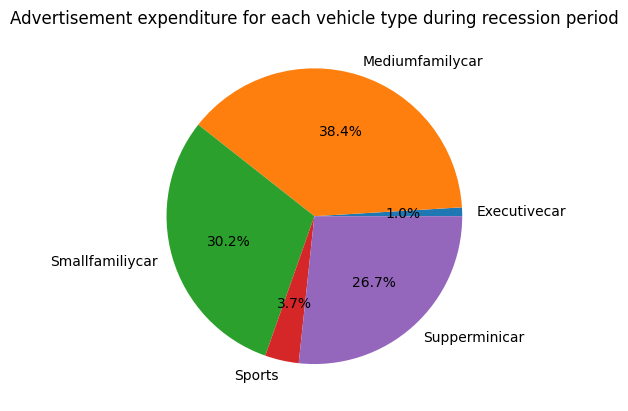

In [65]:
df_kl= df[df['Recession']==1]
df_pie= df_kl.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
sizes=df_pie.values
labels=df_pie.index
plt.pie(sizes,labels=labels, autopct='%1.1f%%' )
plt.title('Advertisement expenditure for each vehicle type during recession period')


During recession the advertisements were mostly focued on low price range vehicle. A wise decision!


----


 ### Effect of unemployment rate  on vehicle type sales

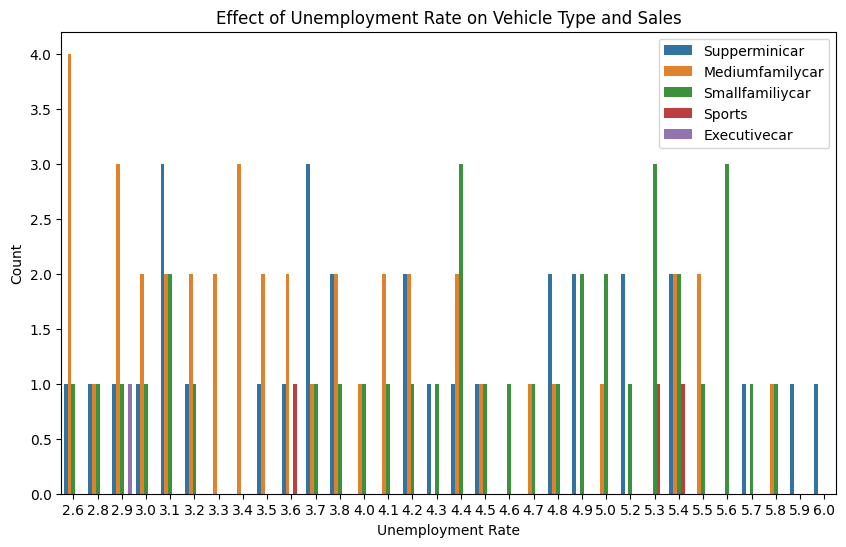

In [61]:
data= df[df['Recession'] == 1]
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='unemployment_rate', hue='Vehicle_Type')    
plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc='upper right')
plt.show()

During recession, buying pattern changed, the sales of low range vehicle like superminicar,smallfamilycar and Mediumminicar have increased and sales of high range cars decreased.